## Importing the libraries for Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the data

In [2]:
df = pd.read_csv("./diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#### Understanding the data

In [3]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
df.shape

(100000, 9)

In [5]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

#### Checking for duplicates value.

In [6]:
duplicates = df.duplicated()
df[duplicates]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


#### Removing Duplicates

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
#Checking
df.shape

(96146, 9)

### Null values or NA values

In [9]:
null_values = df.isnull().sum().sum()
na_values = df.isna().sum().sum()
print(null_values, na_values)

0 0


In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [12]:
df.query('gender == "Other"')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


In [13]:
#removing the 'Others' element
df = df.drop(df[df['gender'] == 'Other'].index)

In [14]:
df['gender'].value_counts()

Female    56161
Male      39967
Name: gender, dtype: int64

In [15]:
df.shape

(96128, 9)

In [16]:
df['smoking_history'].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

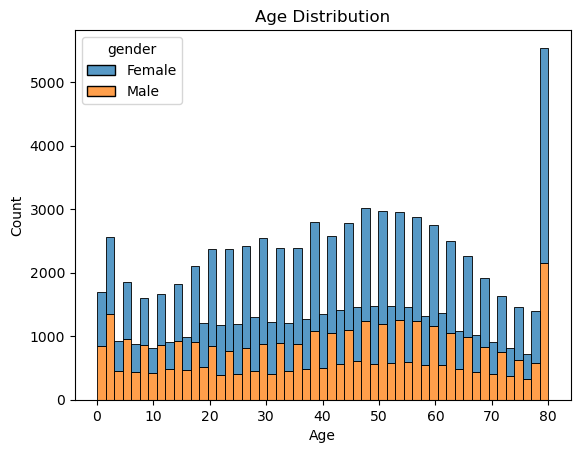

In [17]:
#Histogram for age column
sns.histplot(data=df, x='age', hue='gender', multiple='stack')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

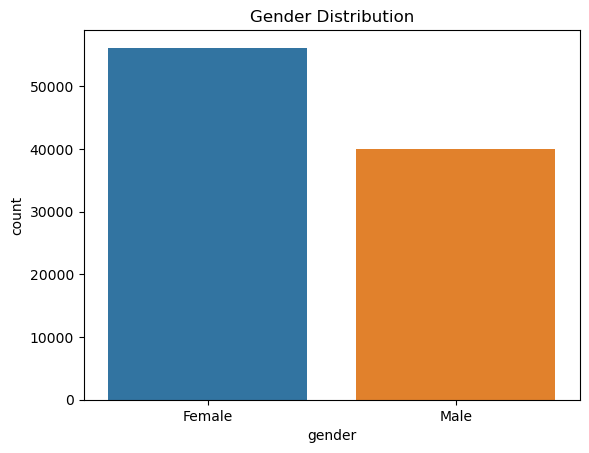

In [18]:
#Histogram for Gender column
sns.countplot(x = 'gender', data = df)
plt.title("Gender Distribution")
plt.show()

C:\Users\Sidharth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


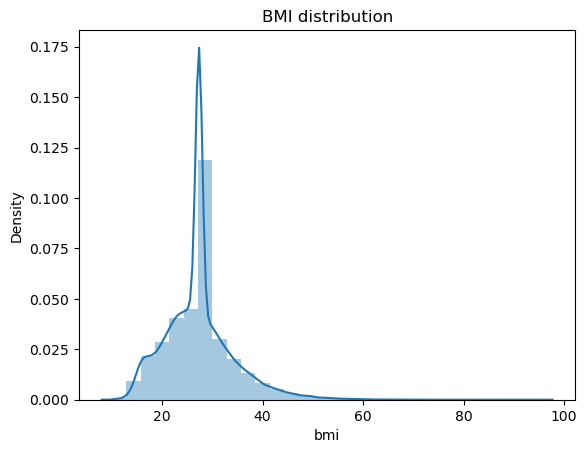

In [19]:
#Distribution for BMI column
sns.distplot(df['bmi'], bins = 30)
plt.title("BMI distribution")
plt.show()

### Distribution of Binary columns

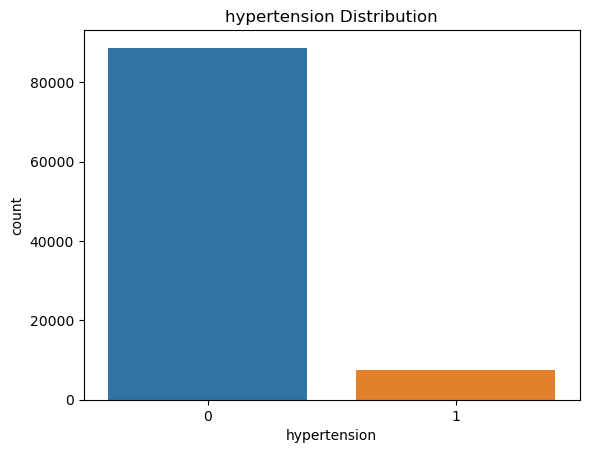

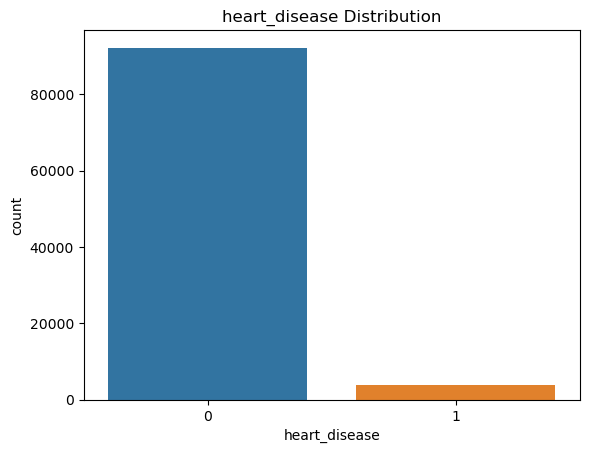

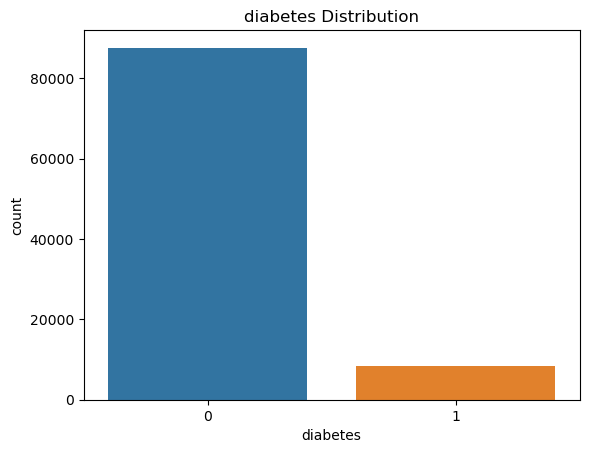

In [20]:
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x = col, data = df)
    plt.title(f'{col} Distribution')
    plt.show()

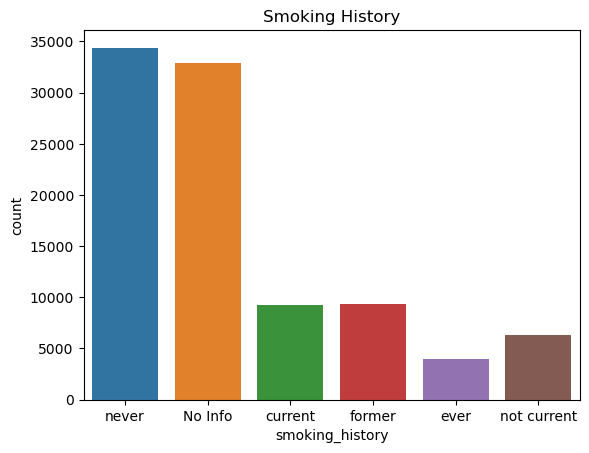

In [21]:
#Smoking History
sns.countplot(x = 'smoking_history', data = df)
plt.title("Smoking History")
plt.show()

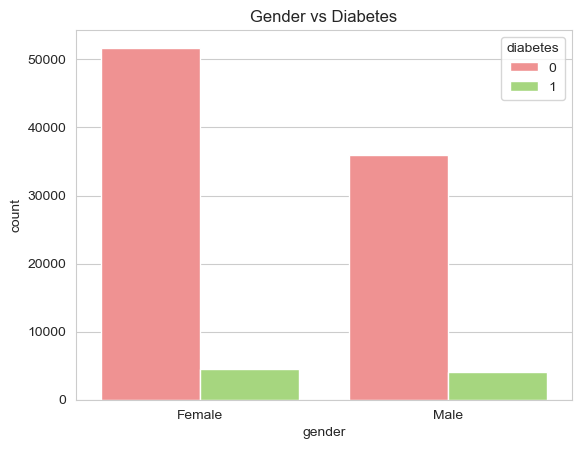

In [22]:
#gender vs diabetes
sns.set_style('whitegrid')
sns.countplot(data=df, x='gender', hue='diabetes', palette=['#FF8282', '#A4E471'])
plt.title("Gender vs Diabetes")
plt.show()

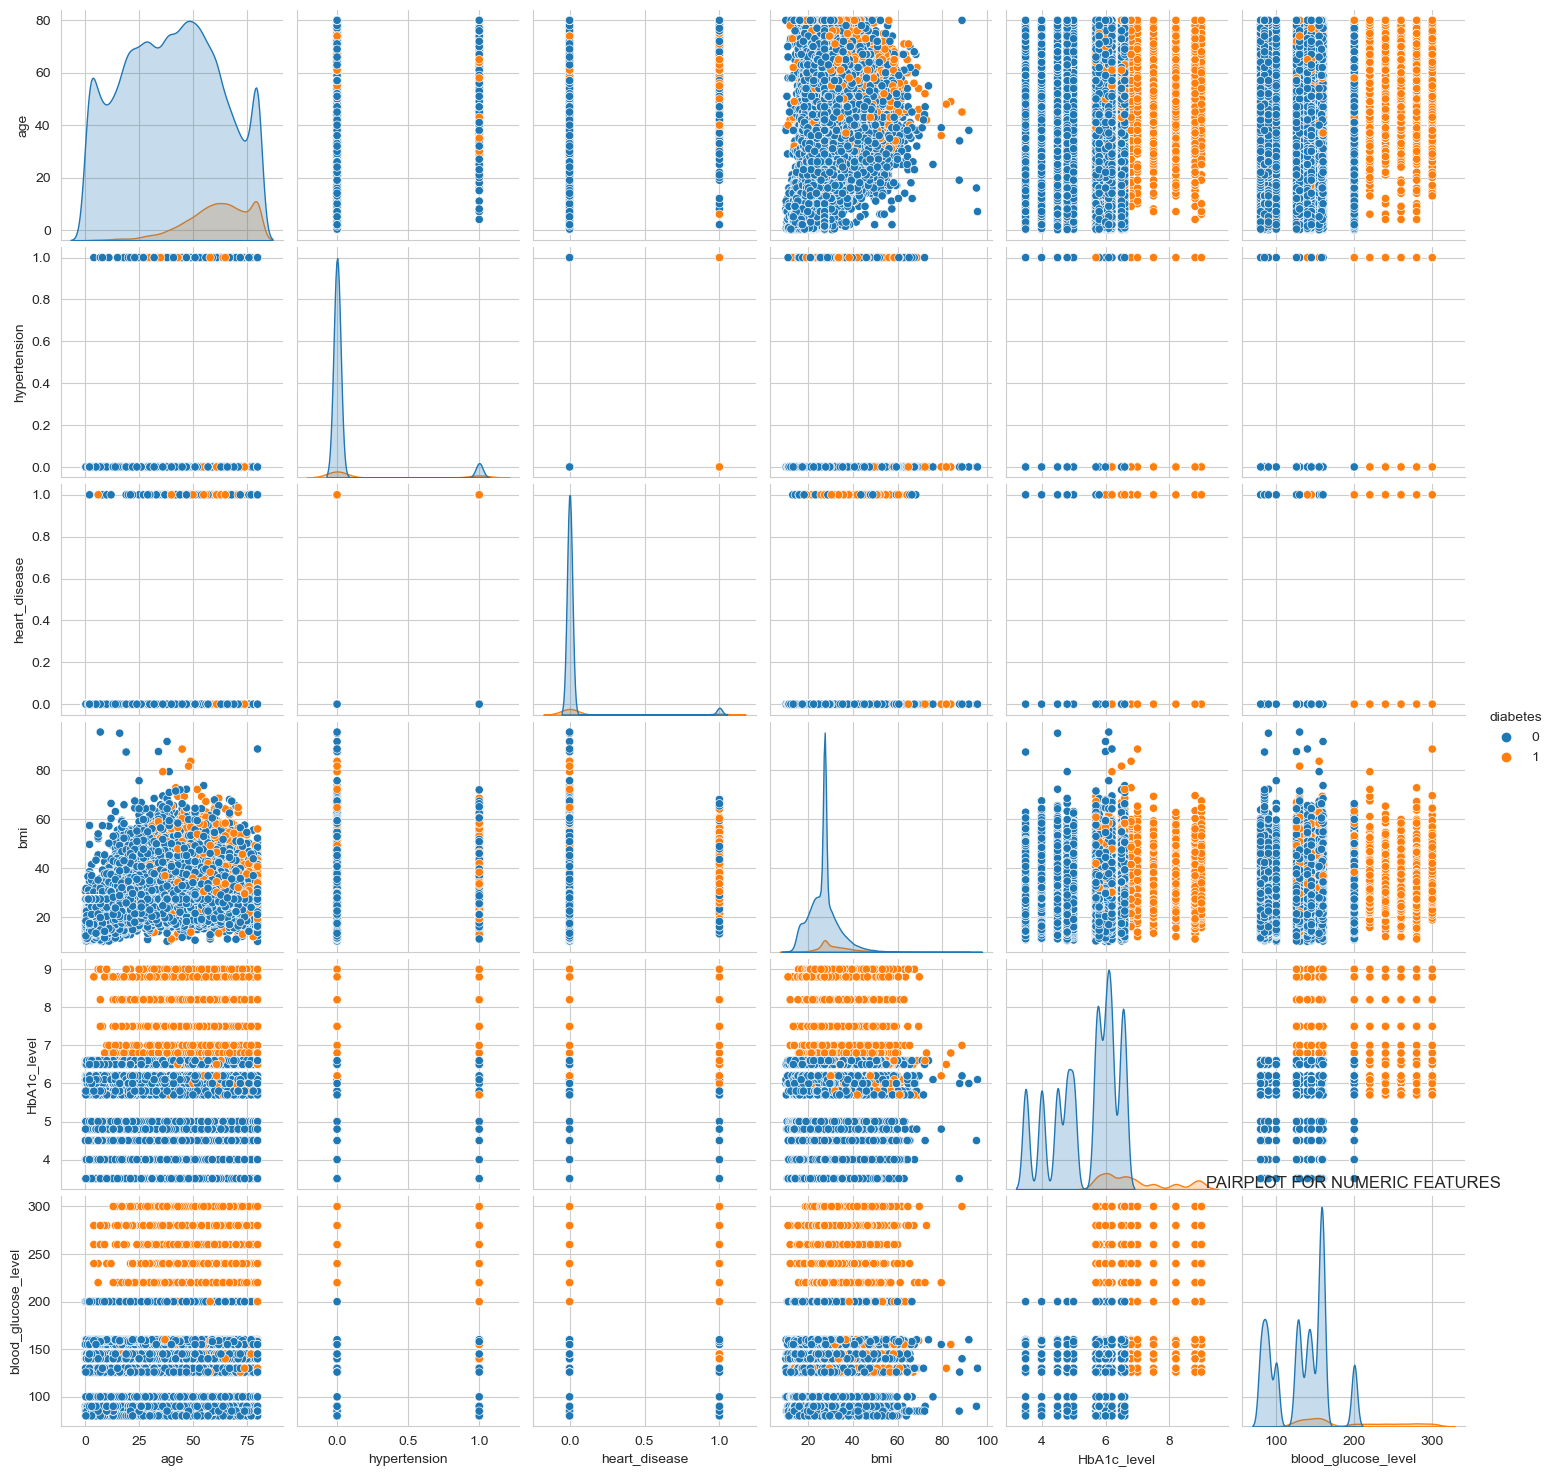

In [23]:
#Pairplot for numeric features
sns.pairplot(df, hue = 'diabetes')
plt.title("PAIRPLOT FOR NUMERIC FEATURES")
plt.show()

### Data Prep

In [24]:
df['smoking_history'].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

In [25]:
#Replace variables with a function by defining it, considering the similarity in their meanings.
def replace_sh_values(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    if smoking_status == 'current':
        return 'current'
    if smoking_status in ['former', 'not current', 'ever']:
        return 'past-smoker'
#after defining the fuction apply this to the dataframe
df['smoking_history'] = df['smoking_history'].apply(replace_sh_values)

#Checking the new values
df['smoking_history'].value_counts()

non-smoker     67276
past-smoker    19655
current         9197
Name: smoking_history, dtype: int64

In [26]:
#Now we copy the data
data = df.copy()

In [27]:
#Now we perform One-Hot Encoding in both the 'gender' and 'smoking_history' column
def perform_ohe(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix = column_name)
    #dropping and adding new columns
    df = pd.concat([df.drop(column_name, axis = 1), dummies], axis = 1)
    return df

#Now we apply the One Hot Encoding
data = perform_ohe(data, 'gender')
data = perform_ohe(data, 'smoking_history')

In [28]:
#checking
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_non-smoker,smoking_history_past-smoker
0,80.0,0,1,25.19,6.6,140,0,1,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,1,0,0


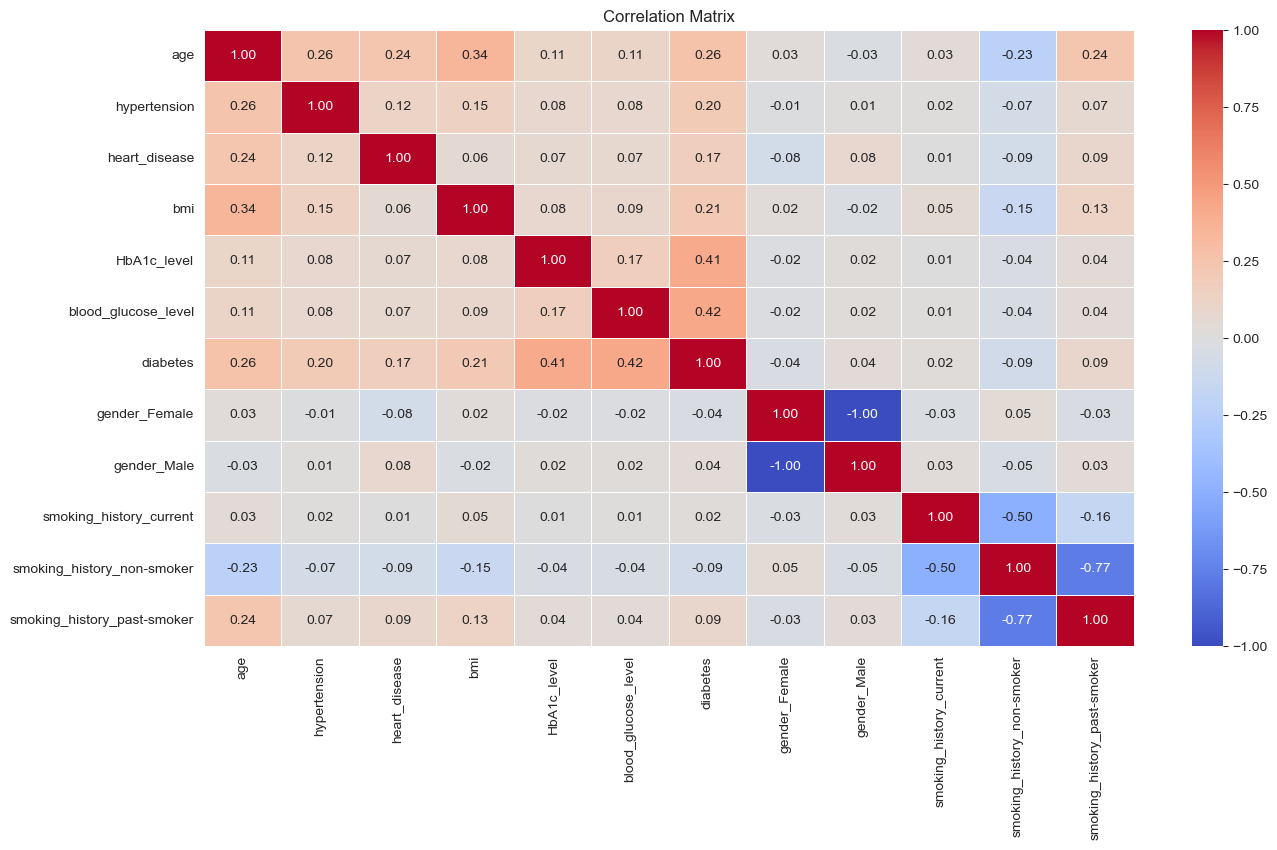

In [29]:
#Plotting the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', linewidths=0.5, fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

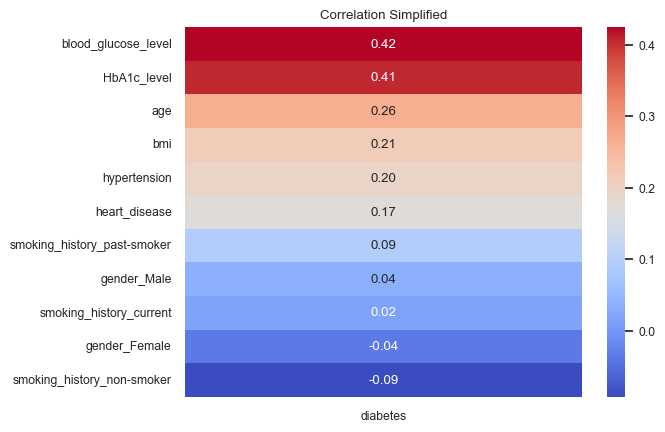

In [30]:
#Since this is somewhat congested of easier understanding for the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

#Sort in descending order
target_corr_sort = target_corr.sort_values(ascending=False)

sns.set(font_scale = 0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sort.to_frame(),cmap='coolwarm', annot=True, fmt = '.2f')
plt.title("Correlation Simplified")
plt.show()

### Importing Necessary *Packages* for further calculations

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

Looking back we can see that more than 90% of people don't have diabetes, Consequently, it is important to acknowledge the potential for **bias in the machine learning model**, so we use *SMOTE(Synthetic Minority Over-sampling Technique)* which generates **synthetic samples for the minority class.**

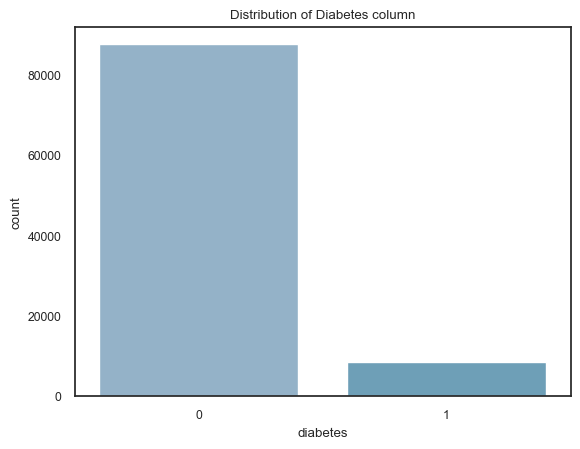

In [32]:
#countplot for diabetes column
sns.countplot(x = 'diabetes', data = df)
plt.title("Distribution of Diabetes column")
plt.show()

In [33]:
#defining re-sampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
print()

In [34]:
#Define Preprocessor
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(),
                   ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
                  ('cat', OneHotEncoder(), ['gender','smoking_history'])])

#Split the data into train and test dataset
X = df.drop('diabetes', axis = 1)
y = df['diabetes']

In [35]:
#Create a pipeline that preprocesses the data, resamples data, and then trains a classifier

clf = imbPipeline(steps = [('preprocessor', preprocessor),
                          ('over', over),
                          ('under', under),
                          ('classifier', RandomForestClassifier())])

In [36]:
#Define the hyper-parameter and the values we want to test
param_grid = {
    'classifier__n_estimators': [50,100,200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2,5,10],
    'classifier__min_samples_leaf': [1,2,4]
}

In [37]:
#Create an Grid Search Object
grid_search = GridSearchCV(clf, param_grid, cv=5)

#Split into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

#Train the model
model = grid_search.fit(X_train, y_train)

#Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


Model Accuracy:  0.9478830750026006
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17559
           1       0.66      0.81      0.73      1667

    accuracy                           0.95     19226
   macro avg       0.82      0.89      0.85     19226
weighted avg       0.95      0.95      0.95     19226



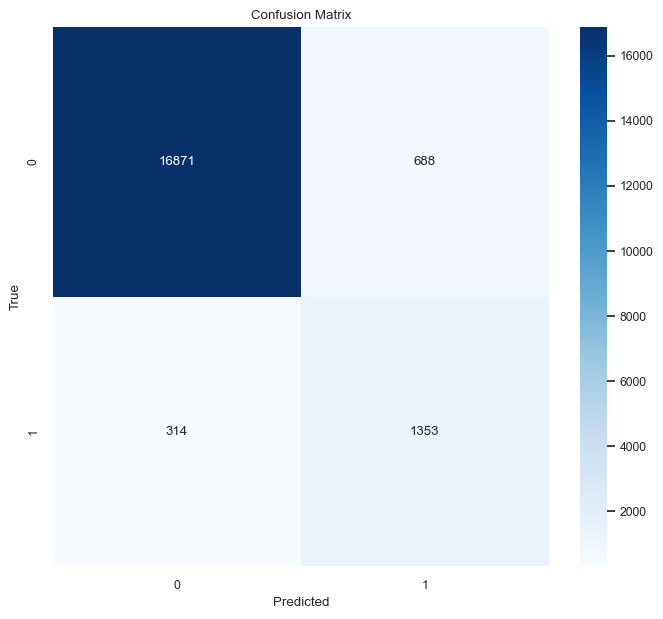

In [38]:
#Predict on the test
y_pred = grid_search.predict(X_test)

#Evaluate the model
print("Model Accuracy: ",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [39]:
import joblib as jb

In [40]:
jb.dump(model, 'model.h5')

['model.h5']